## Data Mining - Airline Flight Predict

### 1. Import Packages

In [1]:
import pandas as pd
from pyecharts.charts import *
import pyecharts.options as opts
from sklearn.metrics import accuracy_score, precision_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import joblib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
pd.set_option('display.max_columns', None)

### 2. Data Exploration and Preview

In [2]:
airlines_data_path = r'./Airlines.csv'
airlines_data=pd.read_csv(airlines_data_path,index_col='id')

In [3]:
# display DataFram
airlines_data.head()

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
id,,,,,,,,
1,CO,269,SFO,IAH,3,15,205,1
2,US,1558,PHX,CLT,3,15,222,1
3,AA,2400,LAX,DFW,3,20,165,1
4,AA,2466,SFO,DFW,3,20,195,1
5,AS,108,ANC,SEA,3,30,202,0


In [4]:
# show data types of each column
airlines_data.dtypes

Airline        object
Flight          int64
AirportFrom    object
AirportTo      object
DayOfWeek       int64
Time            int64
Length          int64
Delay           int64
dtype: object

In [5]:
# generate descriptive statistics of DataFrame
airlines_data.describe()

,Flight,DayOfWeek,Time,Length,Delay
count,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000
mean,2427.928630,3.929668,802.728963,132.202007,0.445442
std,2067.429837,1.914664,278.045911,70.117016,0.497015
min,1.000000,1.000000,10.000000,0.000000,0.000000
25%,712.000000,2.000000,565.000000,81.000000,0.000000
50%,1809.000000,4.000000,795.000000,115.000000,0.000000
75%,3745.000000,5.000000,1035.000000,162.000000,1.000000
max,7814.000000,7.000000,1439.000000,655.000000,1.000000


In [6]:
# check if data is missing
airlines_data.isna().sum() # no missing

Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64

In [7]:
# check if data is repeated
airlines_data.duplicated().sum()

216618

In [8]:
# count of unique values in Delay
airlines_data['Delay'].value_counts()

0    299119
1    240264
Name: Delay, dtype: int64

In [9]:
len(airlines_data[airlines_data['Delay']==1])

240264

In [10]:
# count of all unique values in AirportFrom
len(airlines_data['AirportFrom'].unique())

293

In [11]:
# all unique values in AirportFrom
airlines_data['AirportFrom'].unique()

array(['SFO', 'PHX', 'LAX', 'ANC', 'LAS', 'SLC', 'DEN', 'ONT', 'FAI',
       'BQN', 'PSE', 'HNL', 'BIS', 'IYK', 'EWR', 'BOS', 'MKE', 'GFK',
       'OMA', 'GSO', 'LMT', 'SEA', 'MCO', 'TPA', 'DLH', 'MSP', 'FAR',
       'MFE', 'MSY', 'VPS', 'BWI', 'MAF', 'LWS', 'RST', 'ALB', 'DSM',
       'CHS', 'MSN', 'JAX', 'SAT', 'PNS', 'BHM', 'LIT', 'SAV', 'BNA',
       'ICT', 'ECP', 'DHN', 'MGM', 'CAE', 'PWM', 'ACV', 'EKO', 'PHL',
       'ATL', 'PDX', 'RIC', 'BTR', 'HRL', 'MYR', 'TUS', 'SBN', 'CAK',
       'TVC', 'CLE', 'ORD', 'DAY', 'MFR', 'BTV', 'TLH', 'TYS', 'DFW',
       'FLL', 'AUS', 'CHA', 'CMH', 'LRD', 'BRO', 'CRP', 'LAN', 'PVD',
       'FWA', 'JFK', 'LGA', 'OKC', 'PIT', 'PBI', 'ORF', 'DCA', 'AEX',
       'SYR', 'SHV', 'VLD', 'BDL', 'FAT', 'BZN', 'RDM', 'LFT', 'IPL',
       'EAU', 'ERI', 'BUF', 'IAH', 'MCI', 'AGS', 'ABI', 'GRR', 'LBB',
       'CLT', 'LEX', 'MBS', 'MOD', 'AMA', 'SGF', 'AZO', 'ABE', 'SWF',
       'BGM', 'AVP', 'FNT', 'GSP', 'ATW', 'ITH', 'TUL', 'COS', 'ELP',
       'ABQ', 'SMF',

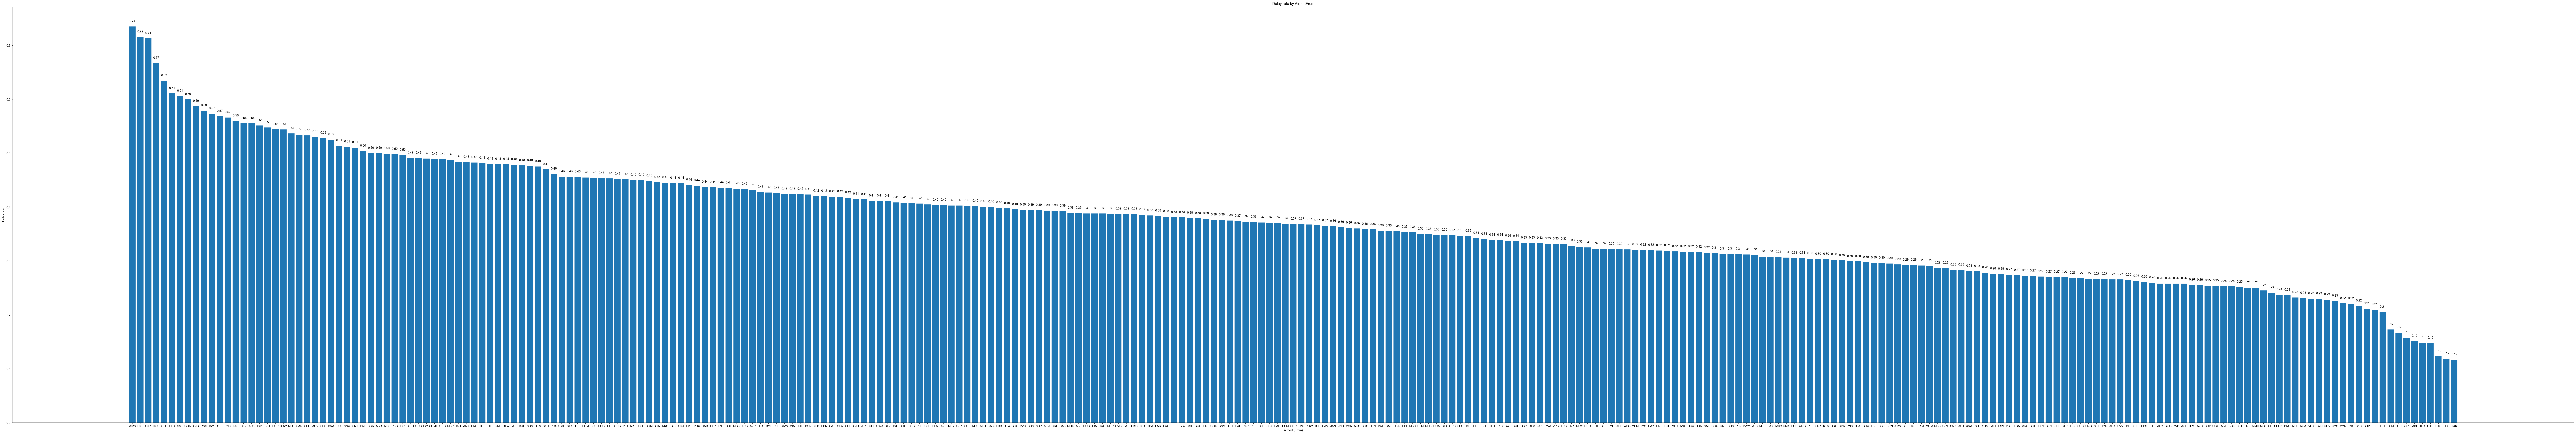

In [12]:
# calculate delay rate by AirportFrom
x=[]
y=[]
AirportFrom_unique=airlines_data.loc[:,'AirportFrom'].unique()
for i in range(len(AirportFrom_unique)):
    AirportFrom_i=airlines_data[airlines_data['AirportFrom']==AirportFrom_unique[i-1]]
    delay_times=len(AirportFrom_i[AirportFrom_i['Delay']==1])
    delay_rate=delay_times/len(AirportFrom_i)
    x.append(AirportFrom_unique[i-1])
    y.append(delay_rate)

# sort by delay_rate and plt bar
tuple=zip(x,y)
tuple=sorted(tuple,key=lambda i:i[1],reverse=True)
x=[i[0] for i in tuple]
y=[i[1] for i in tuple]
plt.figure(figsize=(150,25))
plt.bar(x,y)
plt.title('Delay rate by AirportFrom')
plt.xlabel('Airport (From)')
plt.ylabel('Delay rate')
for a,b in zip(x,y):
    # print(type(a))
    # print(type(b))
    plt.text(a,b+0.01,'%.2f'%b,ha='center',va='center')
plt.show()

In [13]:
# count of all unique values in AirportTo
len(airlines_data['AirportTo'].unique())

293

In [14]:
# all unique values in AirportTo
airlines_data['AirportTo'].unique()

array(['IAH', 'CLT', 'DFW', 'SEA', 'MSP', 'DTW', 'ORD', 'ATL', 'PDX',
       'JFK', 'SLC', 'HNL', 'PHX', 'MCO', 'OGG', 'LAX', 'KOA', 'ITO',
       'SFO', 'MIA', 'IAD', 'SMF', 'PHL', 'LIH', 'DEN', 'LGA', 'MEM',
       'CVG', 'YUM', 'CWA', 'MKE', 'BQN', 'FAI', 'LAS', 'ANC', 'BOS',
       'LGB', 'FLL', 'SJU', 'EWR', 'DCA', 'BWI', 'RDU', 'MCI', 'TYS',
       'SAN', 'ONT', 'OAK', 'MDW', 'BNA', 'DAL', 'CLE', 'JAX', 'JNU',
       'RNO', 'ELP', 'SAT', 'OTZ', 'MBS', 'BDL', 'STL', 'HOU', 'AUS',
       'SNA', 'SJC', 'LIT', 'TUS', 'TUL', 'CMH', 'LAN', 'IND', 'AMA',
       'CRP', 'PIT', 'RKS', 'FWA', 'TPA', 'PBI', 'JAN', 'DSM', 'ADQ',
       'GRB', 'PVD', 'ABQ', 'SDF', 'RSW', 'MSY', 'BUR', 'BOI', 'TLH',
       'BHM', 'ACV', 'ORF', 'BET', 'KTN', 'RIC', 'SRQ', 'BTR', 'XNA',
       'MHT', 'GRR', 'SBN', 'SBA', 'ROA', 'CID', 'GPT', 'MFR', 'SGU',
       'HPN', 'OMA', 'OTH', 'GSP', 'LMT', 'BUF', 'MSN', 'BFL', 'CAE',
       'HRL', 'OKC', 'SYR', 'COS', 'BTV', 'CDC', 'SCC', 'DAY', 'SJT',
       'TVC', 'ROC',

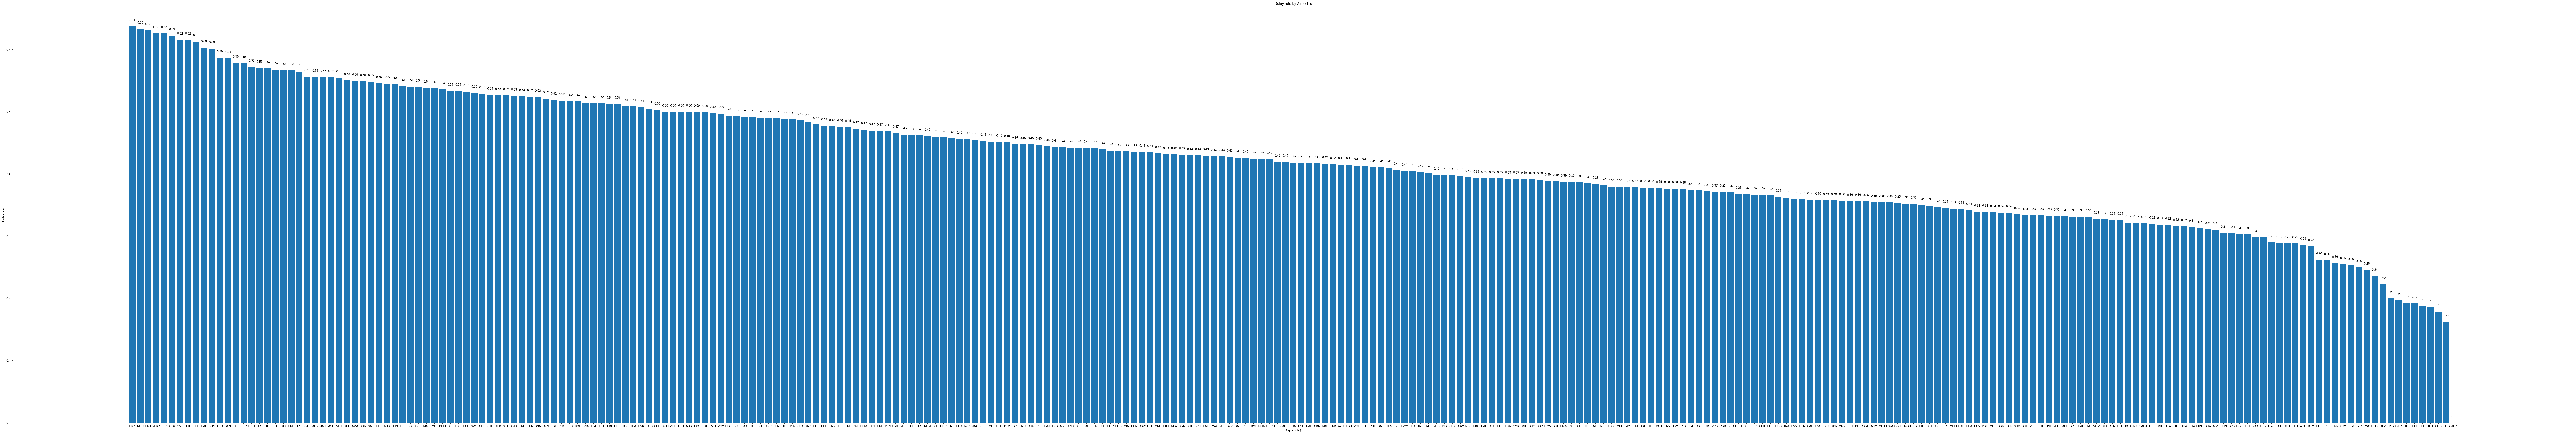

In [15]:
# calculate delay rate by AirportTo
x=[]
y=[]
AirportTo_unique=airlines_data.loc[:,'AirportTo'].unique()
for i in range(len(AirportTo_unique)):
    AirportTo_i=airlines_data[airlines_data['AirportTo']==AirportTo_unique[i-1]]
    delay_times=len(AirportTo_i[AirportTo_i['Delay']==1])
    delay_rate=delay_times/len(AirportTo_i)
    x.append(AirportTo_unique[i-1])
    y.append(delay_rate)

# sort by delay_rate and plt bar
tuple=zip(x,y)
tuple=sorted(tuple,key=lambda i:i[1],reverse=True)
x=[i[0] for i in tuple]
y=[i[1] for i in tuple]
plt.figure(figsize=(150,25))
plt.bar(x,y)
plt.title('Delay rate by AirportTo')
plt.xlabel('Airport (To)')
plt.ylabel('Delay rate')
for a,b in zip(x,y):
    # print(type(a))
    # print(type(b))
    plt.text(a,b+0.01,'%.2f'%b,ha='center',va='center')
plt.show()

In [16]:
airlines_data['Airline'].value_counts()

WN    94097
DL    60940
OO    50254
AA    45656
MQ    36605
US    34500
XE    31126
EV    27983
UA    27619
CO    21118
FL    20827
9E    20686
B6    18112
YV    13725
OH    12630
AS    11471
F9     6456
HA     5578
Name: Airline, dtype: int64

In [17]:
# count of all unique values in Airline
len(airlines_data['Airline'].value_counts())

18

In [18]:
airlines_data['Airline'].unique()

array(['CO', 'US', 'AA', 'AS', 'DL', 'B6', 'HA', 'OO', '9E', 'OH', 'EV',
       'XE', 'YV', 'UA', 'MQ', 'FL', 'F9', 'WN'], dtype=object)

In [19]:
# unique values in Airline
airlines_data['Airline'].value_counts()

WN    94097
DL    60940
OO    50254
AA    45656
MQ    36605
US    34500
XE    31126
EV    27983
UA    27619
CO    21118
FL    20827
9E    20686
B6    18112
YV    13725
OH    12630
AS    11471
F9     6456
HA     5578
Name: Airline, dtype: int64

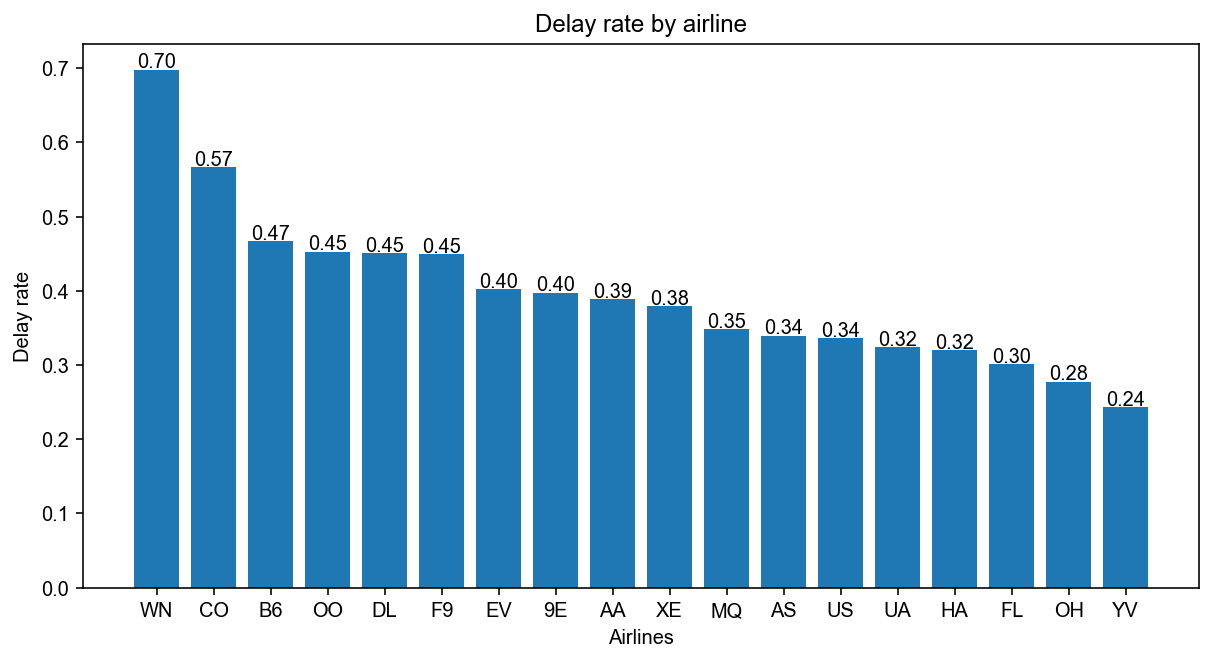

In [20]:
# calculate delay rate by airline
x=[]
y=[]
airline_unique=airlines_data.loc[:,'Airline'].unique()
for i in range(18):
    airline_i=airlines_data[airlines_data['Airline']==airline_unique[i-1]]
    # airline_i=airlines_data.loc(airlines_data['Airline']==airline_unique[i-1])
    delay_times=len(airline_i[airline_i['Delay']==1])
    delay_rate=delay_times/len(airline_i)
    x.append(airline_unique[i-1])
    y.append(delay_rate)

# sort by delay_rate and plt bar
tuple=zip(x,y)
tuple=sorted(tuple,key=lambda i:i[1],reverse=True)
x=[i[0] for i in tuple]
y=[i[1] for i in tuple]
plt.figure(figsize=(10,5))
plt.bar(x,y)
plt.title('Delay rate by airline')
plt.xlabel('Airlines')
plt.ylabel('Delay rate')
for a,b in zip(x,y):
    # print(type(a))
    # print(type(b))
    plt.text(a,b+0.01,'%.2f'%b,ha='center',va='center')
plt.show()

In [21]:
# count of all unique values in DayOfWeek
len(airlines_data['DayOfWeek'].value_counts())

7

In [22]:
airlines_data['DayOfWeek'].unique()

array([3, 4, 5, 6, 7, 1, 2])

In [23]:
# unique values in DayOfWeek
airlines_data['DayOfWeek'].value_counts()

4    91445
3    89746
5    85248
1    72769
2    71340
7    69879
6    58956
Name: DayOfWeek, dtype: int64

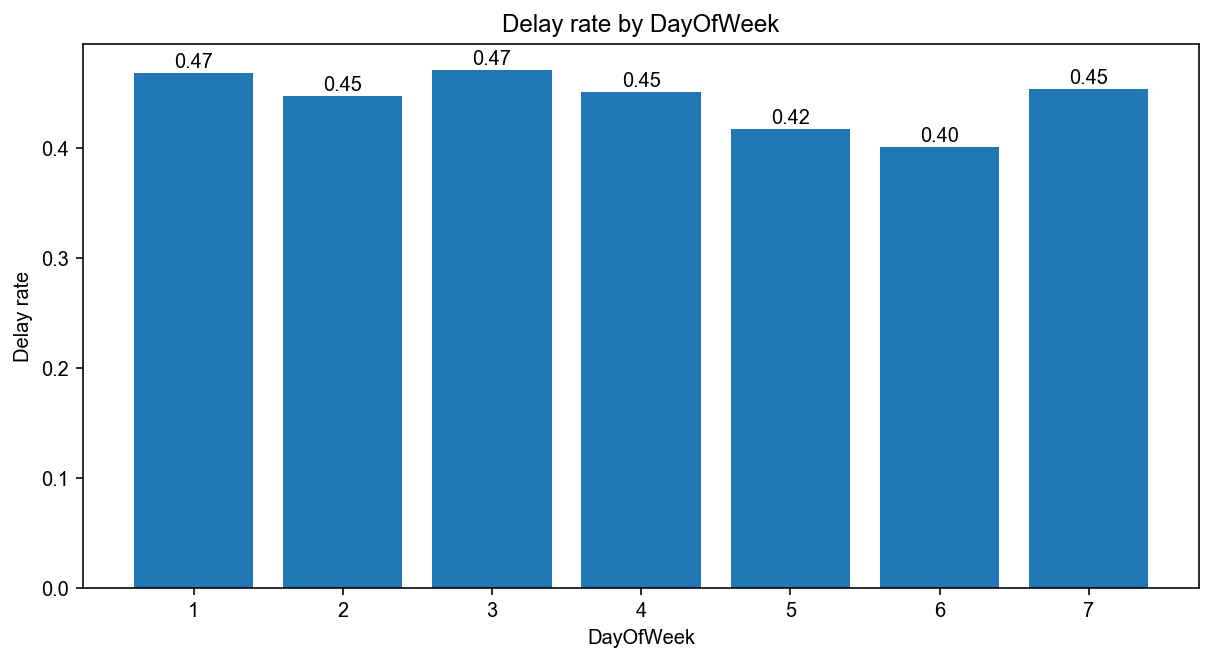

In [24]:
# calculate delay rate by DayOfWeek
x=[]
y=[]
DayOfWeek_unique=airlines_data.loc[:,'DayOfWeek'].unique()
for i in range(len(DayOfWeek_unique)):
    DayOfWeek_i=airlines_data[airlines_data['DayOfWeek']==DayOfWeek_unique[i-1]]
    delay_times=len(DayOfWeek_i[DayOfWeek_i['Delay']==1])
    delay_rate=delay_times/len(DayOfWeek_i)
    x.append(DayOfWeek_unique[i-1])
    y.append(delay_rate)

# sort by delay_rate and plt bar
tuple=zip(x,y)
tuple=sorted(tuple,key=lambda i:i[1],reverse=True)
x=[i[0] for i in tuple]
y=[i[1] for i in tuple]
plt.figure(figsize=(10,5))
plt.bar(x,y)
plt.title('Delay rate by DayOfWeek')
plt.xlabel('DayOfWeek')
plt.ylabel('Delay rate')
for a,b in zip(x,y):
    # print(type(a))
    # print(type(b))
    plt.text(a,b+0.01,'%.2f'%b,ha='center',va='center')
plt.show()

### 3. Data Statistics Analysis

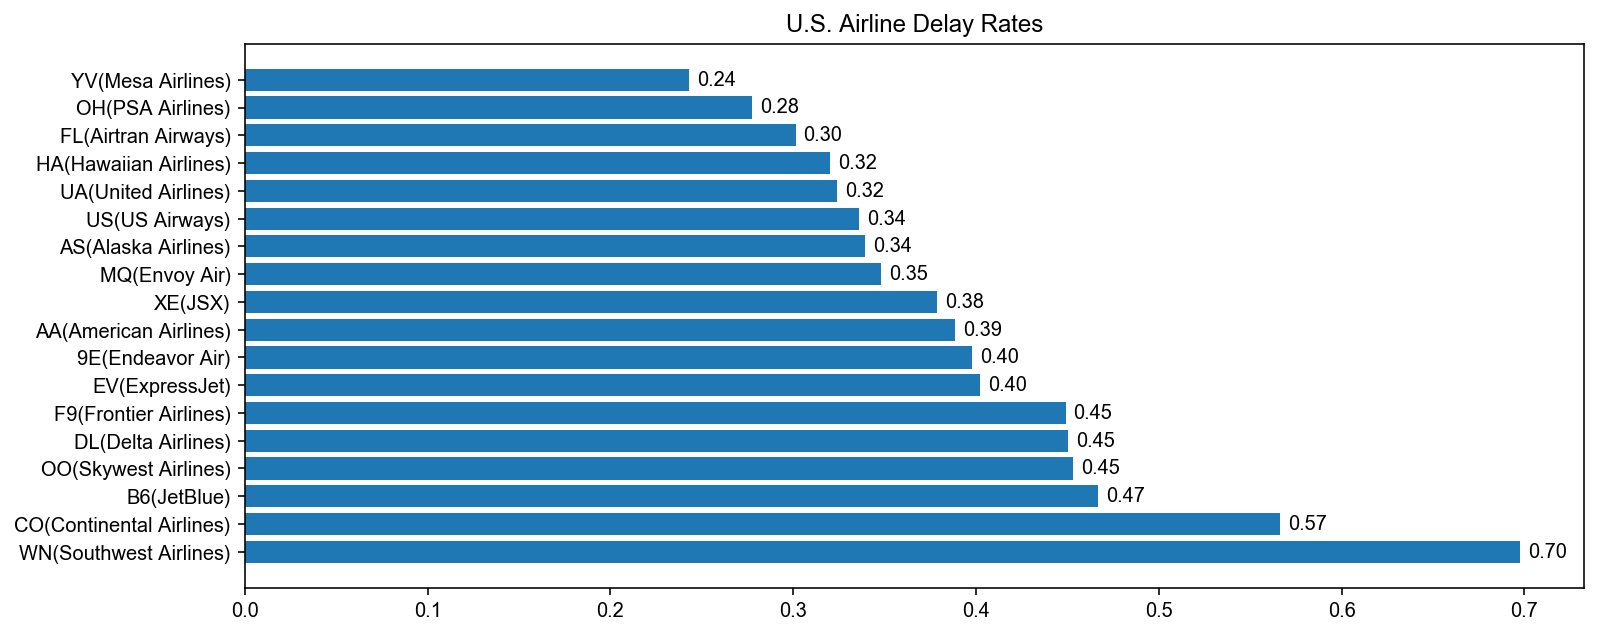

In [37]:
# Airlines delay rate
airlines_delay_rate_dict={
    'WN(Southwest Airlines)':0.6978,
    'DL(Delta Airlines)': 0.4505,
    'OO(Skywest Airlines)': 0.4529,
    'AA(American Airlines)': 0.3885,
    'MQ(Envoy Air)': 0.3481,
    'US(US Airways)': 0.336,
    'XE(JSX)': 0.3789,
    'EV(ExpressJet)': 0.4022,
    'UA(United Airlines)': 0.3239,
    'CO(Continental Airlines)': 0.5662,
    'FL(Airtran Airways)': 0.3013,
    '9E(Endeavor Air)': 0.3977,
    'B6(JetBlue)': 0.467,
    'YV(Mesa Airlines)': 0.2429,
    'OH(PSA Airlines)': 0.2773,
    'AS(Alaska Airlines)': 0.3393,
    'F9(Frontier Airlines)': 0.449,
    'HA(Hawaiian Airlines)': 0.3202
}

dict_value=sorted(airlines_delay_rate_dict.items(),key= lambda item:item[1],reverse=True)
x=[]
y=[]
for data in dict_value:
    x.append(data[0])
    y.append(data[1])
plt.figure(figsize=(12,5))
plt.barh(x[:],y[:])
for a,b in zip(x,y):
    # print(type(a))
    # print(type(b))
    plt.text(b+0.015,a,'%.2f'%b,ha='center',va='center')
plt.title('U.S. Airline Delay Rates')
plt.show()

### 4. Data Preprocessing

In [38]:
airlines_data.head()

# replace days of the week with weekdays or weekends
airlines_data=airlines_data.join(pd.get_dummies(pd.cut(airlines_data['DayOfWeek'],[0,5.5,8],labels=['weekdays','weekend'])))

airlines_data.head()

# replace flight length data with long and short distances
airlines_data=airlines_data.join(pd.get_dummies(pd.cut(airlines_data['Length'],[0,100,200,1000],labels=['Length_short','Length_mid','Length_long'])))
airlines_data=airlines_data.join(pd.get_dummies(pd.cut(airlines_data['Time'],[0,360,1080,1440],labels=['Time_short','Time_mid','Time_long'])))

airlines_data.head()

# numericizing the airportfrom column
airlines_data['AirportFrom'] = airlines_data['AirportFrom'].astype(str)
temp_airline = airlines_data['AirportFrom'].unique()
label_encoder = LabelEncoder().fit(temp_airline)
temp_airline_label = label_encoder.transform(temp_airline)
airlines_data['AirportFrom_id'] = label_encoder.transform(airlines_data['AirportFrom'])

# numericizing the airportto column
airlines_data['AirportTo'] = airlines_data['AirportTo'].astype(str)
temp_airline = airlines_data['AirportTo'].unique()
label_encoder = LabelEncoder().fit(temp_airline)
temp_airline_label = label_encoder.transform(temp_airline)
airlines_data['AirportTo_id'] = label_encoder.transform(airlines_data['AirportTo'])

airlines_data.head()

# numericizing the airline column
airlines_data['Airline'] = airlines_data['Airline'].astype(str)
temp_airline = airlines_data['Airline'].unique()
label_encoder = LabelEncoder().fit(temp_airline)
temp_airline_label = label_encoder.transform(temp_airline)
airlines_data['Airline_id'] = label_encoder.transform(airlines_data['Airline'])

airlines_data.head(100)

# get model training and test data
x_d = airlines_data.loc[:,['Airline_id','AirportFrom_id','AirportTo_id','weekdays','Time','Length']]
y_d = airlines_data.loc[:,'Delay']

# extract model training and test data
x_train_d, x_test_d, y_train_d, y_test_d = train_test_split(x_d, y_d, test_size=0.2, random_state=2)

In [39]:
airlines_data

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,weekdays,weekend,Length_short,Length_mid,Length_long,Time_short,Time_mid,Time_long,AirportFrom_id,AirportTo_id,Airline_id
id,,,,,,,,,,,,,,,,,,,
1,CO,269,SFO,IAH,3,15,205,1,1,0,0,0,1,1,0,0,253,135,4
2,US,1558,PHX,CLT,3,15,222,1,1,0,0,0,1,1,0,0,217,60,14
3,AA,2400,LAX,DFW,3,20,165,1,1,0,0,1,0,1,0,0,154,80,1
4,AA,2466,SFO,DFW,3,20,195,1,1,0,0,1,0,1,0,0,253,80,1
5,AS,108,ANC,SEA,3,30,202,0,1,0,0,0,1,1,0,0,14,252,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539379,CO,178,OGG,SNA,5,1439,326,0,1,0,0,0,1,0,0,1,203,264,4
539380,FL,398,SEA,ATL,5,1439,305,0,1,0,0,0,1,0,0,1,252,16,8
539381,FL,609,SFO,MKE,5,1439,255,0,1,0,0,0,1,0,0,1,253,184,8


In [40]:
# diaplay all columns
pd.set_option('display.max_columns', None)
# display all rows
pd.set_option('display.max_rows', None)
# set max display colomns
pd.set_option('max_colwidth',100)
x=airlines_data.loc[:,['AirportFrom','AirportFrom_id']]
x_d.head(500)

,Airline_id,AirportFrom_id,AirportTo_id,weekdays,Time,Length
id,,,,,,
1,4,253,135,1,15,205
2,14,217,60,1,15,222
3,1,154,80,1,20,165
4,1,253,80,1,20,195
5,2,14,252,1,30,202
6,4,154,135,1,30,181
7,5,154,197,1,30,220
8,5,217,85,1,30,228
9,5,253,197,1,35,216


### 5. Model Training

In [41]:
# record model effects
model_details=[]

# model prodict
def model_pro(model_):
    model_d_list=[]
    # initialize models
    model=model_
    # record running time
    old_time = time.time()
    model.fit(x_train_d,y_train_d)
    current_time = time.time()
    use_time = round(current_time-old_time,4)
    # model predict
    pre = model.predict(x_test_d)
    pre = pre.astype(np.int64)
    # use accuracy score
    precision = round(accuracy_score(pre,y_test_d),4)
    model_d_list.append(str(model_))
    model_d_list.append(use_time)
    model_d_list.append(precision)
    model_details.append(model_d_list)

# 高斯朴素贝叶斯
gnb = GaussianNB()
model_pro(gnb)

# 伯努利朴素贝叶斯
bnb = BernoulliNB()
model_pro(bnb)

# 多项式朴素贝叶斯
mnb = MultinomialNB()
model_pro(mnb)

# K近邻
knn = KNeighborsClassifier(n_neighbors=3)
model_pro(knn)

# 线性回归
lr = LinearRegression()
model_pro(lr)

# 逻辑回归
lgr = LogisticRegression()
model_pro(lgr)

# 决策树-使用信息熵
dtc_e = DecisionTreeClassifier(criterion='entropy')
model_pro(dtc_e)

# 决策树-使用基尼系数
dtc_g = DecisionTreeClassifier(criterion='gini',max_depth=20)
model_pro(dtc_g)

# 随机森林
rfc = RandomForestClassifier()
model_pro(rfc)

In [42]:
# print model training result
df = pd.DataFrame(model_details, columns=['model_name', 'use_time', 'accuracy_score'])
df.sort_values('accuracy_score',ascending=False)

,model_name,use_time,accuracy_score
7,DecisionTreeClassifier(max_depth=20),1.7413,0.6550
6,DecisionTreeClassifier(criterion='entropy'),1.9015,0.6527
8,RandomForestClassifier(),60.7060,0.6527
3,KNeighborsClassifier(n_neighbors=3),0.7429,0.6314
0,GaussianNB(),0.1295,0.5802
5,LogisticRegression(),1.8500,0.5793
1,BernoulliNB(),0.1328,0.5555
4,LinearRegression(),0.0674,0.5555
2,MultinomialNB(),0.0923,0.5288


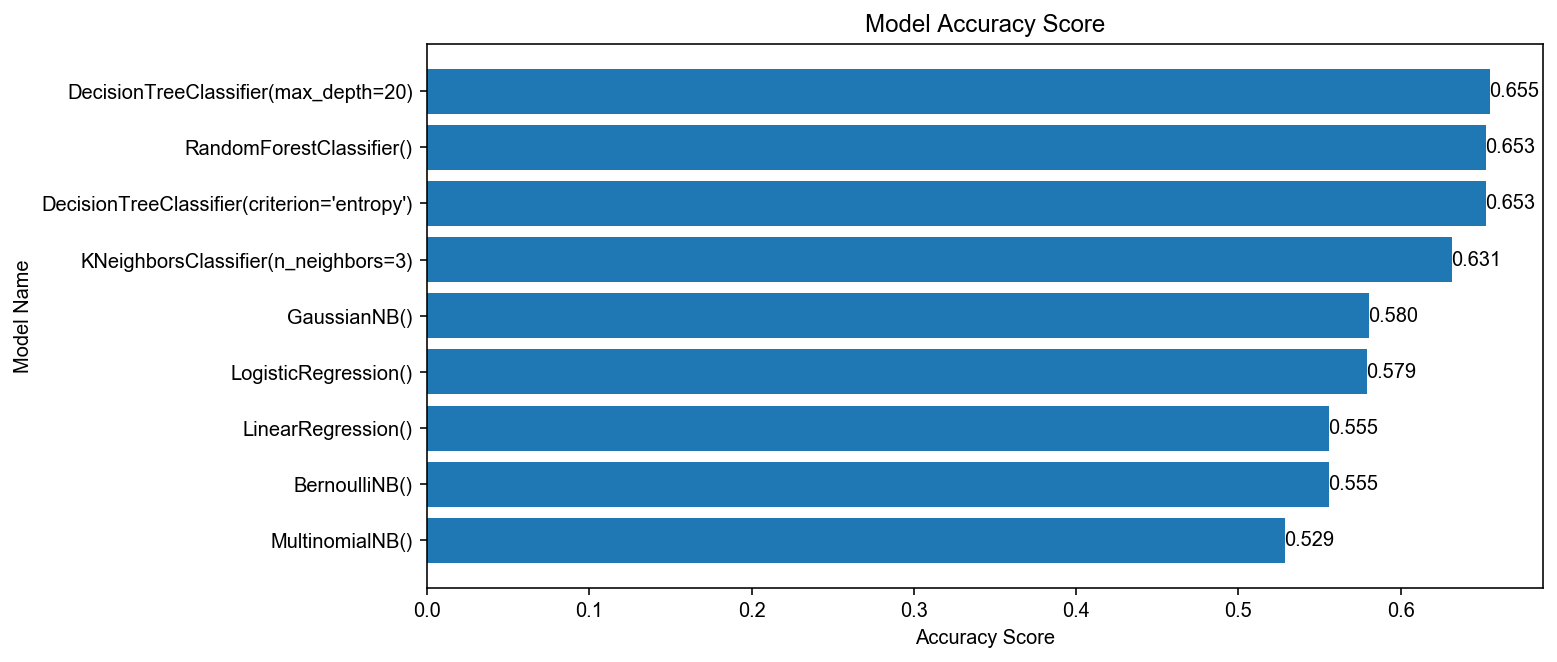

In [44]:
# plot the model accuracy

x=[]
y=[]
for i in range(len(df)):
    model_name=df.iat[i,0]
    accuracy_score=df.iat[i,2]
    x.append(model_name)
    y.append(accuracy_score)

# sort by accuracy_score and plt bar
tuple=zip(x,y)
tuple=sorted(tuple,key=lambda i:i[1],reverse=False)
x=[i[0] for i in tuple]
y=[i[1] for i in tuple]
plt.figure(figsize=(10,5))
plt.barh(x,y)
plt.title('Model Accuracy Score')
plt.xlabel('Accuracy Score')
plt.ylabel('Model Name')
for a,b in zip(x,y):
    # print(type(a))
    # print(type(b))
    plt.text(b+0.015,a,'%.3f'%b,ha='center',va='center')
plt.show()

In [45]:
# save the best model
best_model=dtc_g
joblib.dump(best_model,'./model.pkl')

['./model.pkl']

### 6. Model Prediction

In [46]:
a=1
b=35
c=277
d=10
e=1230
f=7

df = { 
    'Airline':[a],
    'AirportFrom': [b],  
    'AirportTo': [c],
    'weekdays':[d],
    'Time':[e],
    'Length':[f]
}
df=pd.DataFrame(df)

prediction_result=best_model.predict(df)

# print result
prediction_result[0]

/Users/zx/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Airline
- AirportFrom
- AirportTo
Feature names seen at fit time, yet now missing:
- Airline_id
- AirportFrom_id
- AirportTo_id

  warnings.warn(message, FutureWarning)


0